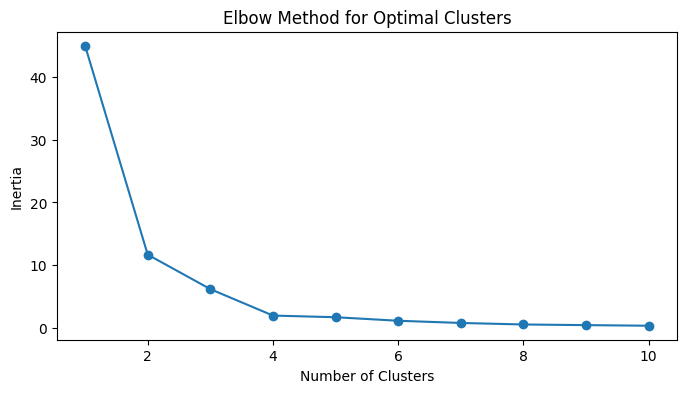

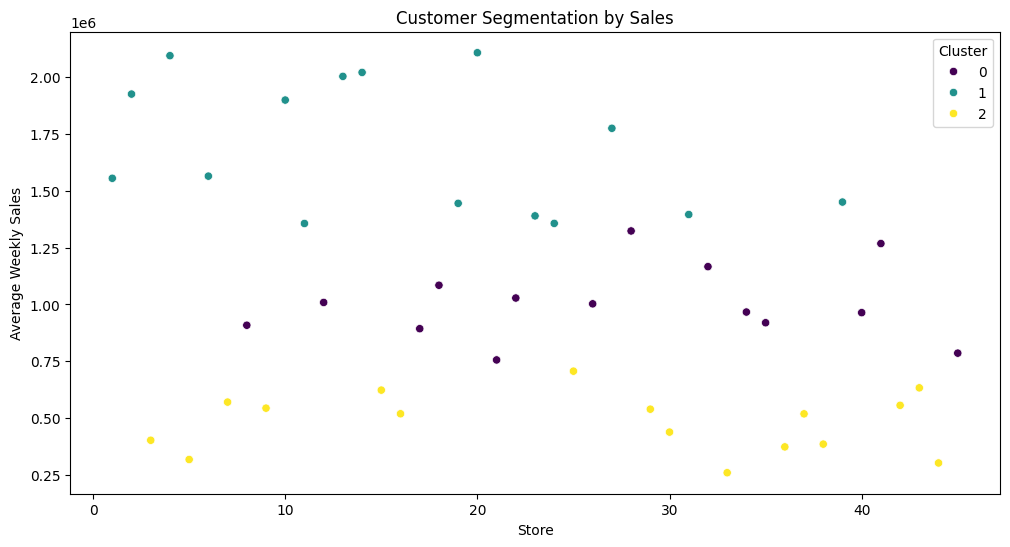

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

df = pd.read_csv('/Users/zoobiasyed/Downloads/Walmart.csv')

store_sales = df.groupby('Store')['Weekly_Sales'].mean().reset_index()

scaler = StandardScaler()
store_sales_scaled = scaler.fit_transform(store_sales[['Weekly_Sales']])

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(store_sales_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
store_sales['Cluster'] = kmeans.fit_predict(store_sales_scaled)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=store_sales, x='Store', y='Weekly_Sales', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation by Sales')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.show()


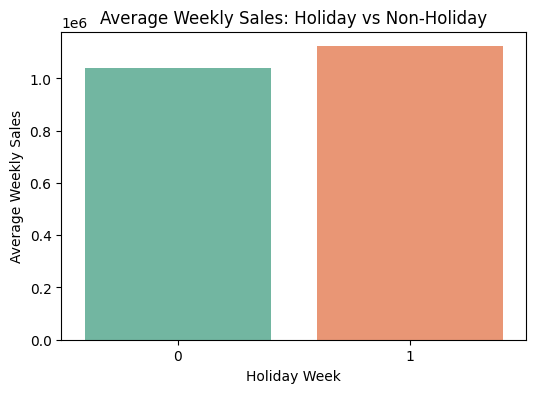

In [8]:
# Marketing Analysis During Holidays

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

holiday_sales_df = holiday_sales.reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=holiday_sales_df, hue='Holiday_Flag', palette='Set2', legend=False)
plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
plt.xlabel('Holiday Week')
plt.ylabel('Average Weekly Sales')
plt.show()
